In [402]:
import numpy as np
from PIL import Image
import scipy as sc
import os

FILES_DIR = os.path.abspath('tmp')

In [403]:
def applyMeanFilter(n, image, imageName):
    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            sum = 0

            for i in range(n):
                for j in range(n):
                    sum += image[y - offset + i, x - offset + j]
            
            filteredImage[y, x] = sum / (n ** 2)
    
    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/filters/mean/{imageName}_meanFilter_{n}.bmp')

def applyMedianFilter(n, image, imageName):
    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            filteredImage[y, x] = np.median(image[y - offset:y - offset + n, x - offset:x - offset + n])

    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/filters/median/{imageName}_medianFilter_{n}.bmp')

def applyGaussianFilter(n, image, imageName):
    pascalLine = sc.linalg.pascal(n, kind = 'lower')[-1]
    mask = 1 / np.sum(np.outer(pascalLine, pascalLine)) * np.outer(pascalLine, pascalLine)

    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            sum = 0

            for i in range(n):
                for j in range(n):
                    sum += image[y - offset + j, x - offset + i] * mask[j, i]
            
            filteredImage[y, x] = sum
    
    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/filters/gaussian/{imageName}_gaussianFilter_{n}.bmp')

def applyLaplacianFilter(image, imageName, mask, maskID, normalized = False, n = 3):
    mask = np.asarray(mask)
    offset = n // 2

    if normalized:
        mask = 1 / (n ** 2) * mask

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            for i in range(n):
                for j in range(n):
                    filteredImage[y, x] += image[y - offset + j, x - offset + i] * mask[j, i]
    
    filterImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage = Image.fromarray(image.astype(np.uint8) + filteredImage.astype(np.uint8))

    filterImage.show()
    filteredImage.show()

    nameAux = f'{imageName}_laplacian'
    if normalized:
        nameAux = f'{imageName}_normalizedLaplacian'

    filterImage.save(f'{FILES_DIR}/filters/laplacian/{nameAux}Filter_{maskID}.bmp')
    filteredImage.save(f'{FILES_DIR}/filters/laplacian/{nameAux}Filtered_{maskID}.bmp')

Imagem fruits.bmp:


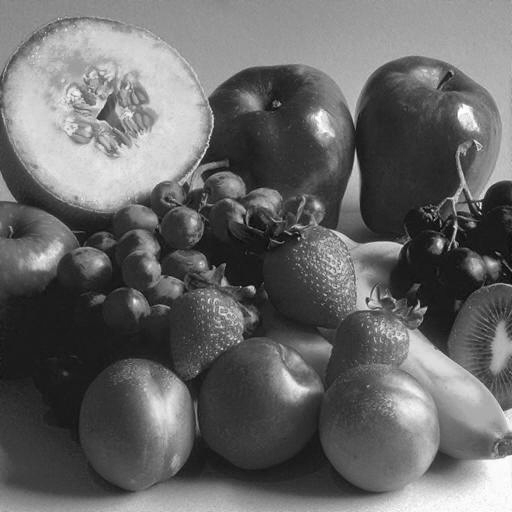

Filtro da Média (3x3):


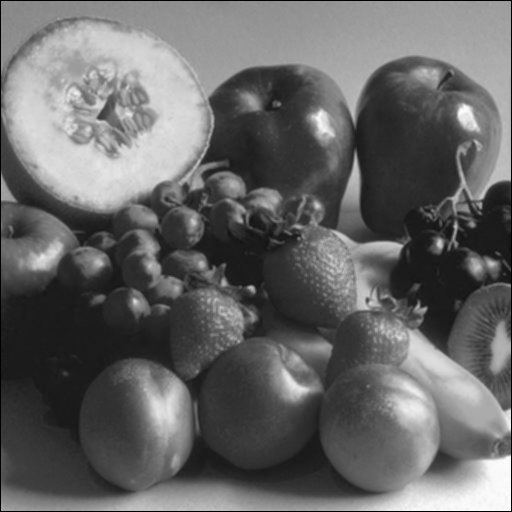

Filtro da Mediana (3x3):


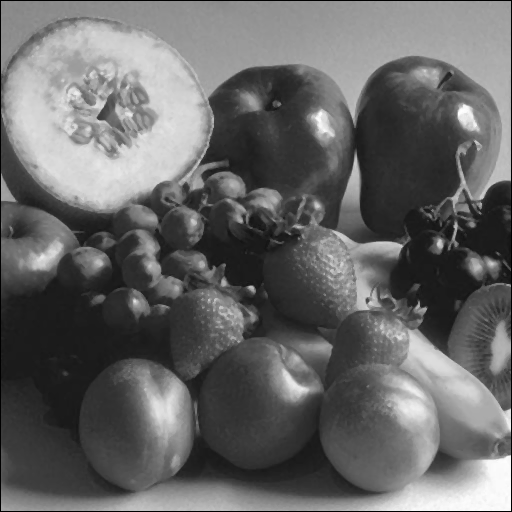

Filtro Gaussiano (3x3):


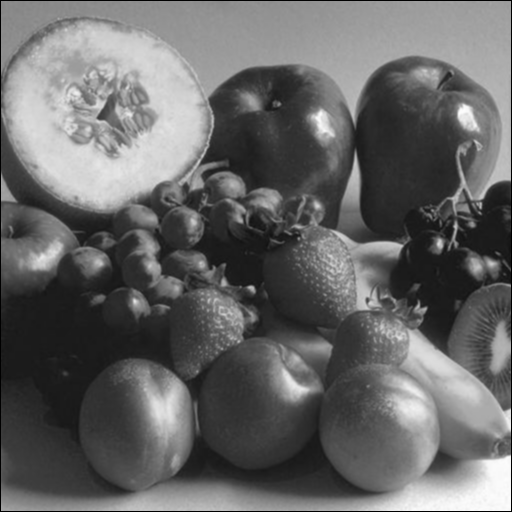

Filtro da Média (5x5):


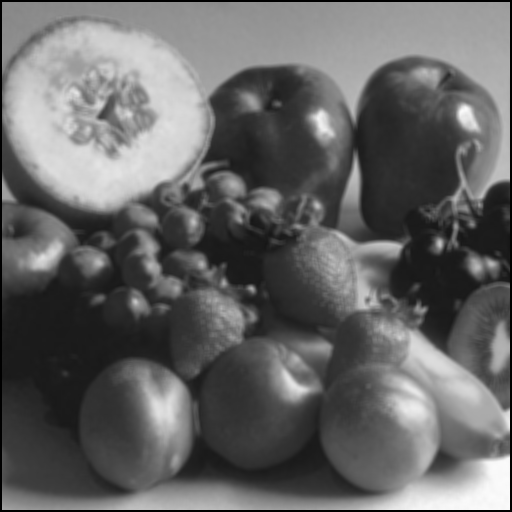

Filtro da Mediana (5x5):


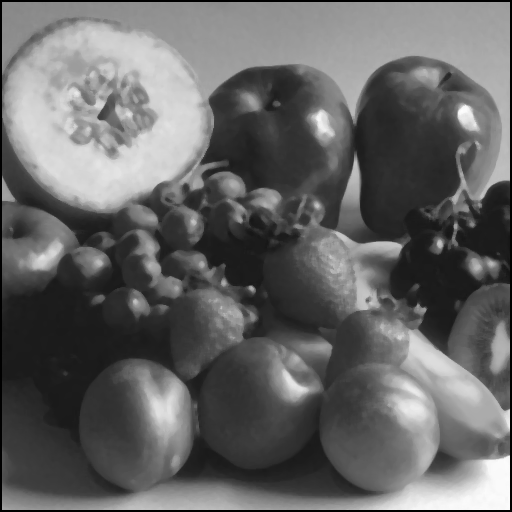

Filtro Gaussiano (5x5):


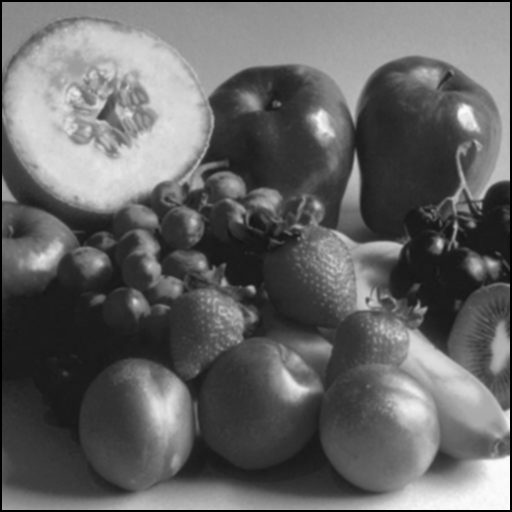

Filtro Laplaciano (0):


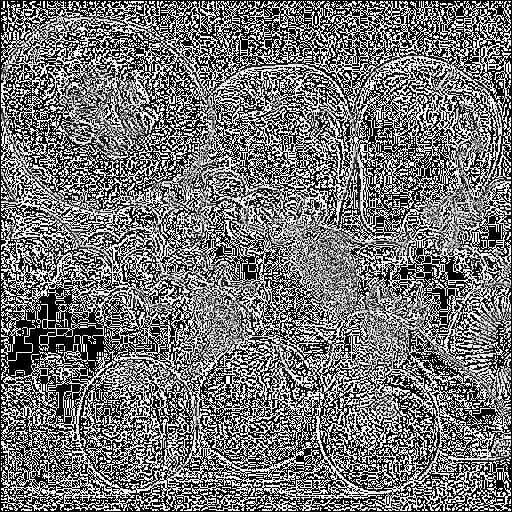

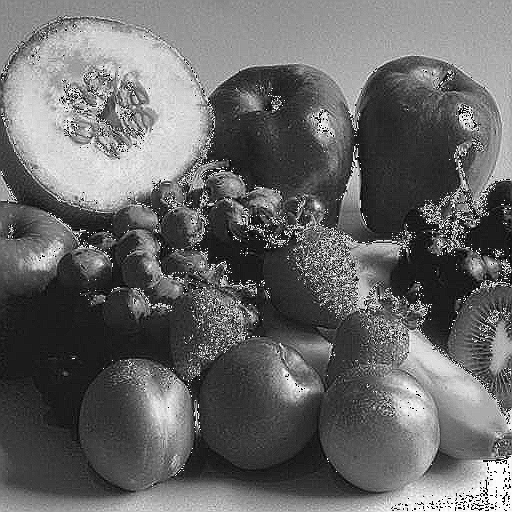

Filtro Laplaciano Normalizado (0):


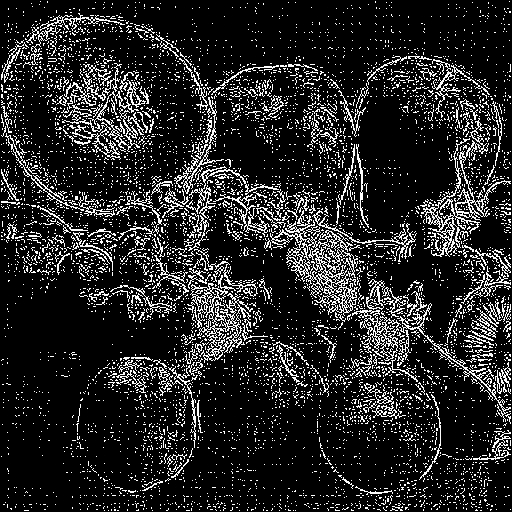

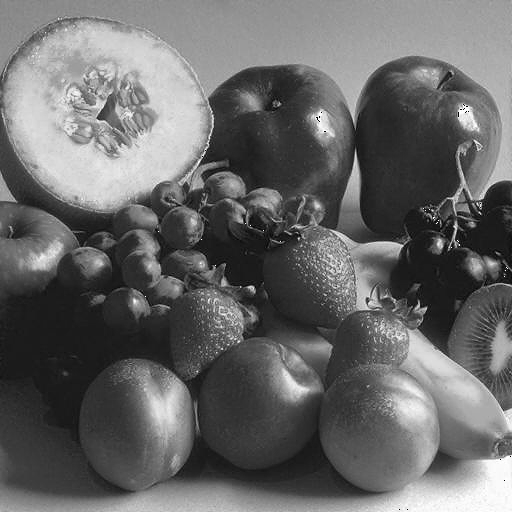

Filtro Laplaciano (1):


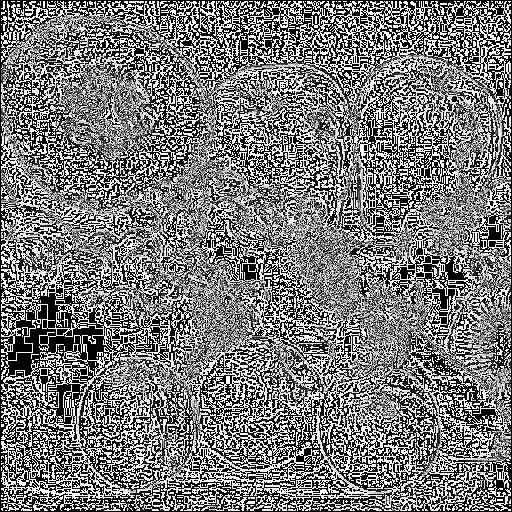

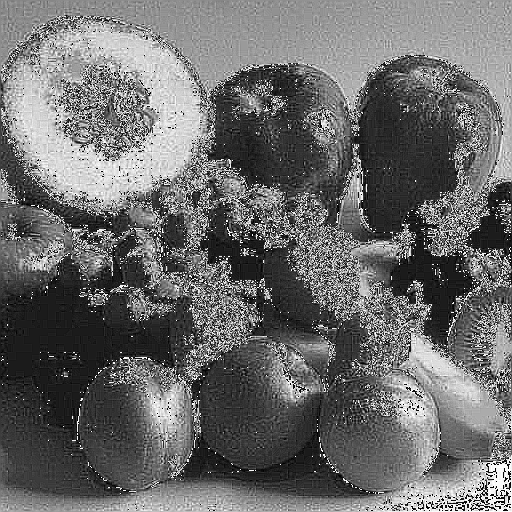

Filtro Laplaciano Normalizado (1):


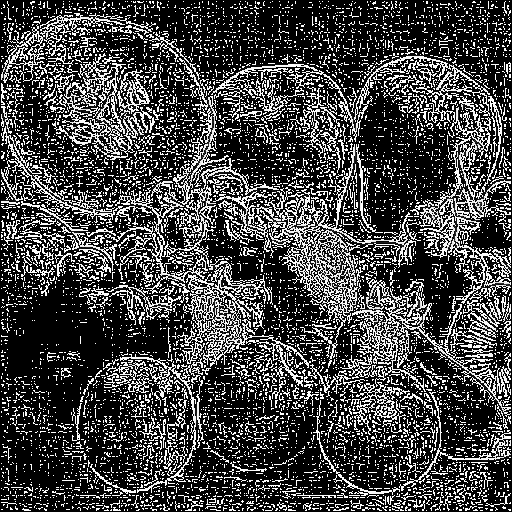

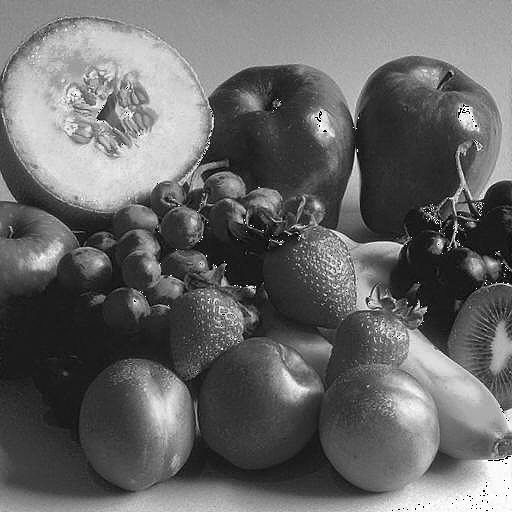

Imagem mammogram.bmp:


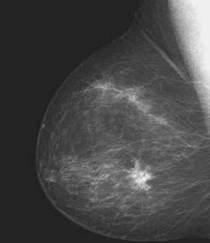

Filtro da Média (3x3):


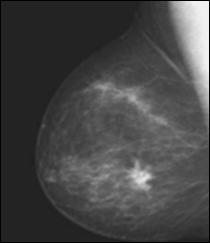

Filtro da Mediana (3x3):


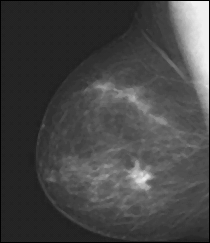

Filtro Gaussiano (3x3):


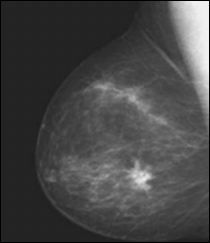

Filtro da Média (5x5):


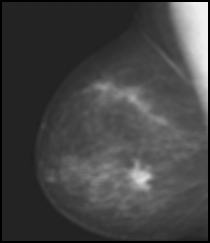

Filtro da Mediana (5x5):


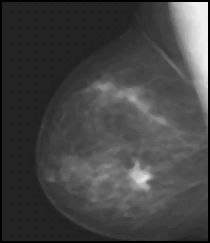

Filtro Gaussiano (5x5):


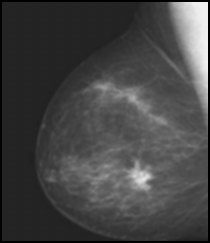

Filtro Laplaciano (0):


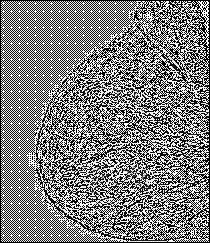

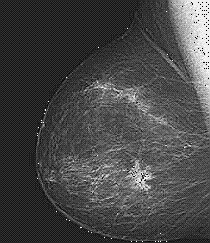

Filtro Laplaciano Normalizado (0):


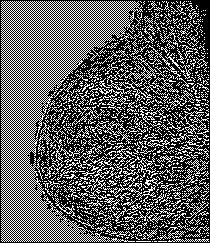

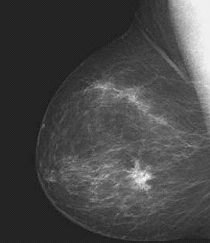

Filtro Laplaciano (1):


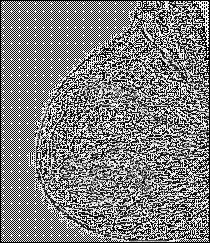

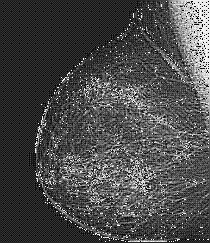

Filtro Laplaciano Normalizado (1):


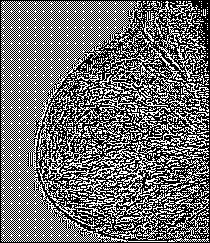

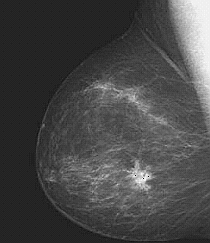

Imagem moon.bmp:


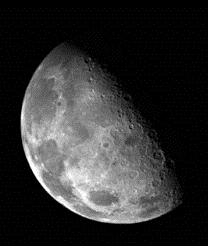

Filtro da Média (3x3):


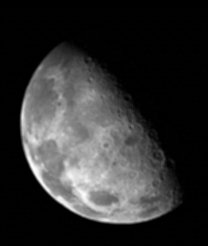

Filtro da Mediana (3x3):


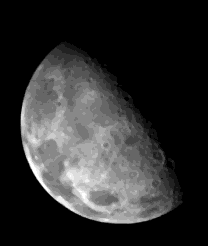

Filtro Gaussiano (3x3):


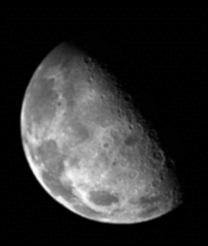

Filtro da Média (5x5):


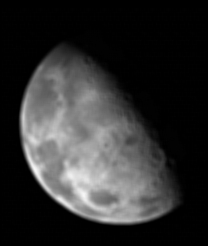

Filtro da Mediana (5x5):


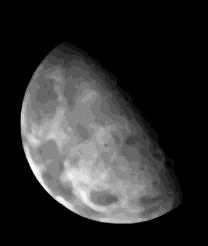

Filtro Gaussiano (5x5):


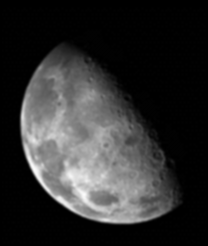

Filtro Laplaciano (0):


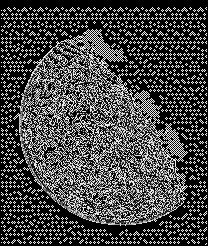

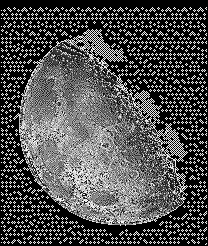

Filtro Laplaciano Normalizado (0):


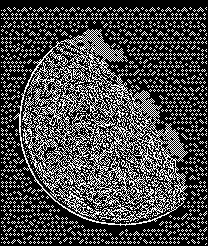

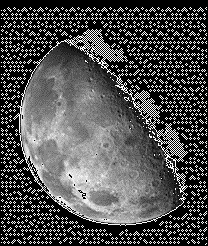

Filtro Laplaciano (1):


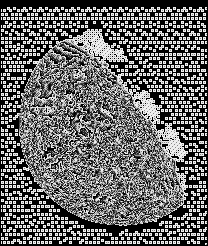

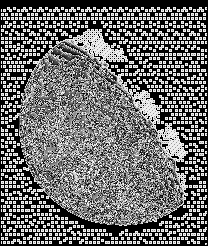

Filtro Laplaciano Normalizado (1):


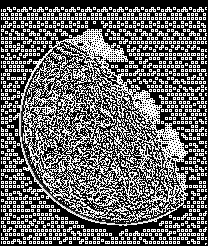

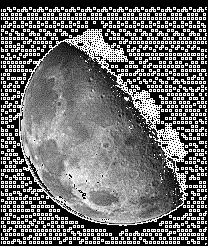

Imagem polen.bmp:


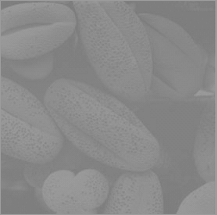

Filtro da Média (3x3):


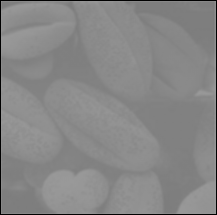

Filtro da Mediana (3x3):


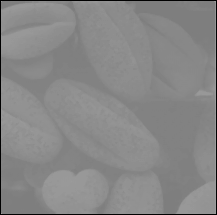

Filtro Gaussiano (3x3):


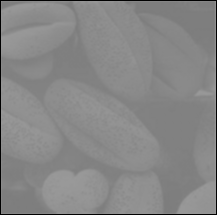

Filtro da Média (5x5):


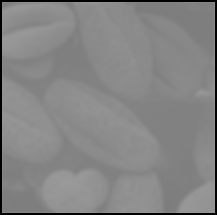

Filtro da Mediana (5x5):


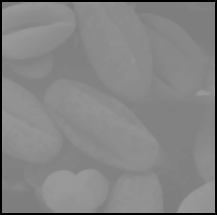

Filtro Gaussiano (5x5):


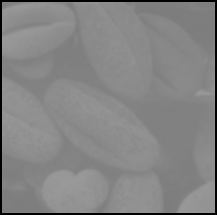

Filtro Laplaciano (0):


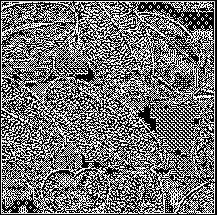

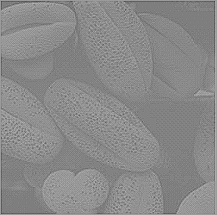

Filtro Laplaciano Normalizado (0):


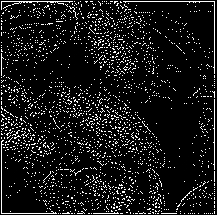

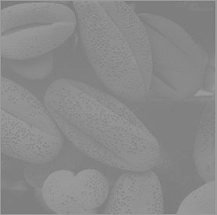

Filtro Laplaciano (1):


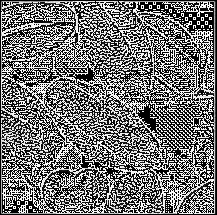

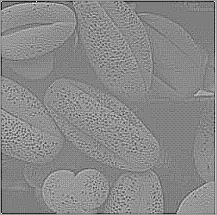

Filtro Laplaciano Normalizado (1):


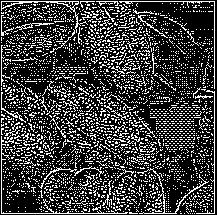

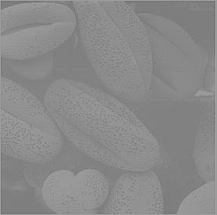

In [404]:
os.makedirs(f'{FILES_DIR}/filters/gaussian', exist_ok = True)
os.makedirs(f'{FILES_DIR}/filters/laplacian', exist_ok = True)
os.makedirs(f'{FILES_DIR}/filters/mean', exist_ok = True)
os.makedirs(f'{FILES_DIR}/filters/median', exist_ok = True)

images = [
    'fruits.bmp',
    'mammogram.bmp',
    'moon.bmp',
    'polen.bmp'
]

laplacianMasks = [
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
]

windowSizes = [3, 5]

for imageName in images:
    print(f'Imagem {imageName}:')

    image = Image.open(f'tmp/original/{imageName}').convert('L')
    imageName = str.split(imageName, '.')[0]

    image.show()

    for size in windowSizes:
        print(f'Filtro da Média ({size}x{size}):')
        applyMeanFilter(size, image, imageName)

        print(f'Filtro da Mediana ({size}x{size}):')
        applyMedianFilter(size, image, imageName)

        print(f'Filtro Gaussiano ({size}x{size}):')
        applyGaussianFilter(size, image, imageName)

    for i, mask in enumerate(laplacianMasks):
        print(f'Filtro Laplaciano ({i}):')
        applyLaplacianFilter(image, imageName, mask, i)

        print(f'Filtro Laplaciano Normalizado ({i}):')
        applyLaplacianFilter(image, imageName, mask, i, True)